In [17]:
import statistics
import numpy as np
from PIL import Image
import cv2
import pandas as pd
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
# Dicecの計算
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice


In [18]:
import os
# ファイル名の先頭部分（prefix）により自動的にファイル名を抽出するアルゴリズム。

""" 

Extracts filenames in directory if they start with the prefix input 


Args/Parameters:

    directory_path (string): The path of the dir (ex: /root/home/Documents/etc)
    
    prefix (string): Prefix of the file name (ex: 'Bo' is a prefix of 'Bone')

Returns:

    sorted_file_names (list of str): File names sorted in ascending order in the dir without extension ex: ['bone1', 'bone2', ...]

Raises:

    SomeError: ...

"""

def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names


In [19]:

#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/1-20250206-Unet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/2-20250205-MCunet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/3-20250208-TransUnet-CRF-HP/fold1/crf")

#unet
# searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-Net-108")
# #searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/MCU-108-21Dil (MRCNN)")
# #mcunet

# #searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU10821-CustomLoss")
# searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250724-MCU108-CustomLoss")
# print(searchdir)



# for icisip
searchdir = str("/home/eric/Desktop/icisip2025/U-Net")
searchdir2 = str("/home/eric/Desktop/icisip2025/MCU-Net")


index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
image: N1-1 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
Count1 =  [60905, 796, 563, 679, 417, 201, 433, 524, 368, 401, 249]
Count2 =  [59638, 982, 525, 602, 443, 582, 448, 802, 386, 706, 422]
Count3 =  [59253, 762, 514, 562, 384, 155, 395, 229, 323, 0, 121]
Dice =  [0.983101465866952, 0.8571428571428571, 0.9448529411764706, 0.87743950039032, 0.8930232558139535, 0.3959131545338442, 0.8967082860385925, 0.3453996983408748, 0.8567639257294429, 0.0, 0.36065573770491804, 0.6427899356871274]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
Count1 =  [60818, 600, 547, 770, 420, 572, 439, 507, 361, 383, 119]
Count2 =  [59638, 982, 525, 60

[ WARN:0@2040.444] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@2040.444] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@2040.444] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-1.png'): can't open/read file: check file path/integrity


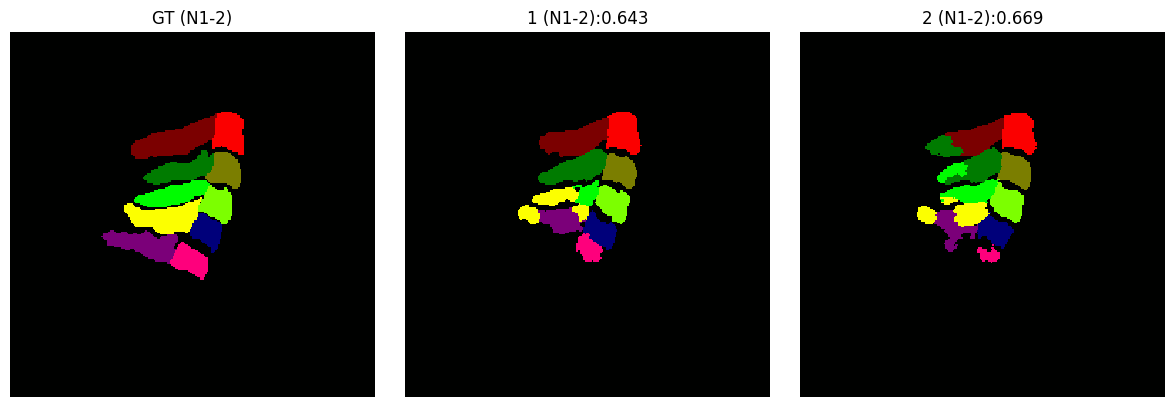

[ WARN:0@2040.636] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2040.636] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N1-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2040.636] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-3.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-3.png
image: N1-3 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
Count1 =  [60289, 1067, 626, 777, 492, 406, 408, 402, 43, 609, 417]
Count2 =  [58722, 924, 620, 824, 522, 812, 456, 849, 470, 926, 411]
Count3 =  [58423, 879, 595, 746, 474, 392, 379, 51, 0, 0, 0]
Dice =  [0.9818084042651519, 0.8829733802109493, 0.9550561797752809, 0.9319175515302935, 0.9349112426035503, 0.6436781609195402, 0.8773148148148148, 0.0815347721822542, 0.0, 0.0, 0.0, 0.5307386102036683]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
Count1 =  [60035, 1193, 617, 785, 512, 429, 354, 321, 138, 713, 439]
Count2 =  [58722, 924, 620, 824, 522, 812, 456, 849, 470, 926,

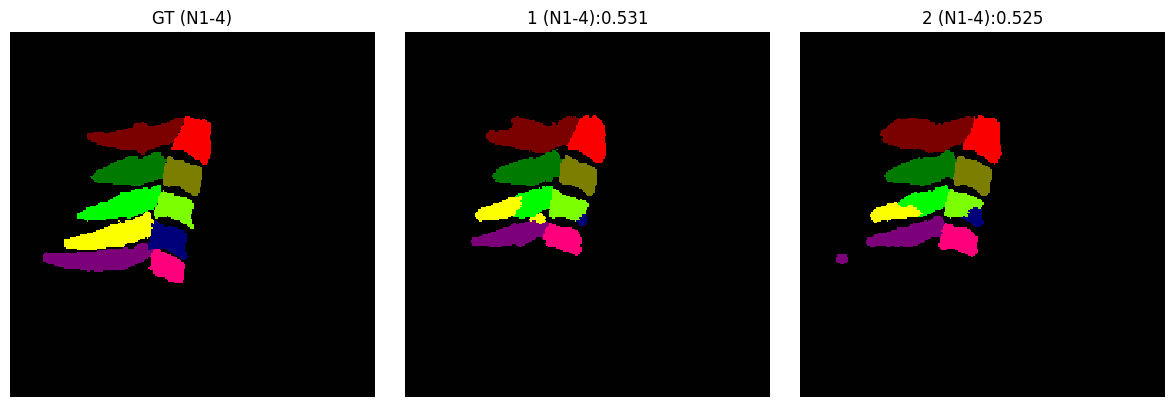

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-5.png
image: N1-5 not found


[ WARN:0@2040.835] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-5.png'): can't open/read file: check file path/integrity
[ WARN:0@2040.835] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N1-5.png'): can't open/read file: check file path/integrity
[ WARN:0@2040.835] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-5.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
Count1 =  [56633, 1443, 936, 944, 666, 639, 483, 1079, 849, 1163, 701]
Count2 =  [56133, 1665, 975, 962, 669, 1005, 674, 1020, 641, 1054, 738]
Count3 =  [55627, 1431, 831, 885, 614, 620, 458, 742, 598, 998, 664]
Dice =  [0.9865917031729422, 0.9208494208494209, 0.869701726844584, 0.9286463798530955, 0.9198501872659176, 0.754257907542579, 0.7917026793431288, 0.7070033349213911, 0.8026845637583893, 0.9003157419936851, 0.9228630993745657, 0.8517875041746757]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
Count1 =  [56818, 1474, 919, 911, 662, 699, 640, 999, 699, 1039, 676]
Count2 =  [56133, 1665, 975, 962, 669, 1005, 674, 1020, 641, 1054, 738]
Count3 =  [55719, 1458, 840, 871, 607, 681, 587, 788, 611, 957, 634]
Dice =  [0.9866048109357155, 0.9

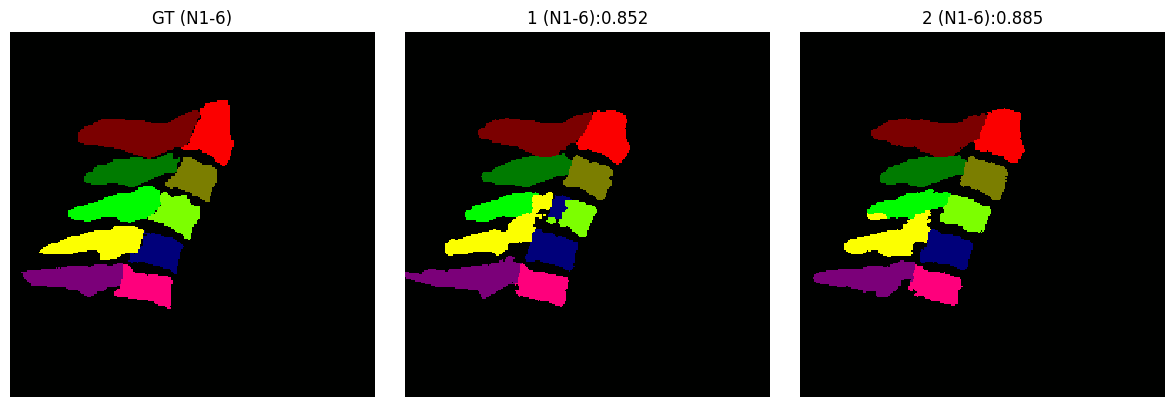

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-7.png
image: N1-7 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-8.png
image: N1-8 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
image: N1-9 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-10.png
image: N1-10 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png


[ WARN:0@2041.024] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.024] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N1-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.024] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.025] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.025] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N1-8.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.025] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N1-8.png'): can't open/read file: ch

Count1 =  [55952, 1330, 947, 1020, 633, 1247, 641, 1116, 691, 1185, 774]
Count2 =  [56123, 1386, 910, 1048, 645, 954, 666, 1044, 829, 1349, 582]
Count3 =  [55187, 1253, 840, 884, 600, 922, 587, 886, 660, 1131, 486]
Dice =  [0.984822663395048, 0.9226804123711341, 0.9046849757673667, 0.8549323017408124, 0.9389671361502347, 0.8378009995456611, 0.8982402448355011, 0.8203703703703704, 0.868421052631579, 0.8926598263614838, 0.7168141592920354, 0.8655571479066179]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
Count1 =  [56292, 1433, 975, 1033, 712, 1115, 611, 833, 683, 1298, 551]
Count2 =  [56123, 1386, 910, 1048, 645, 954, 666, 1044, 829, 1349, 582]
Count3 =  [55368, 1265, 866, 875, 611, 764, 540, 694, 642, 1169, 431]
Dice =  [0.9850642707823689, 0.8974813763746009, 0.9188328912466843, 0.8409418548774628, 0.9005158437730287, 0.7385210246495891, 0.845732184808144, 0.7394778902503996, 0.8492

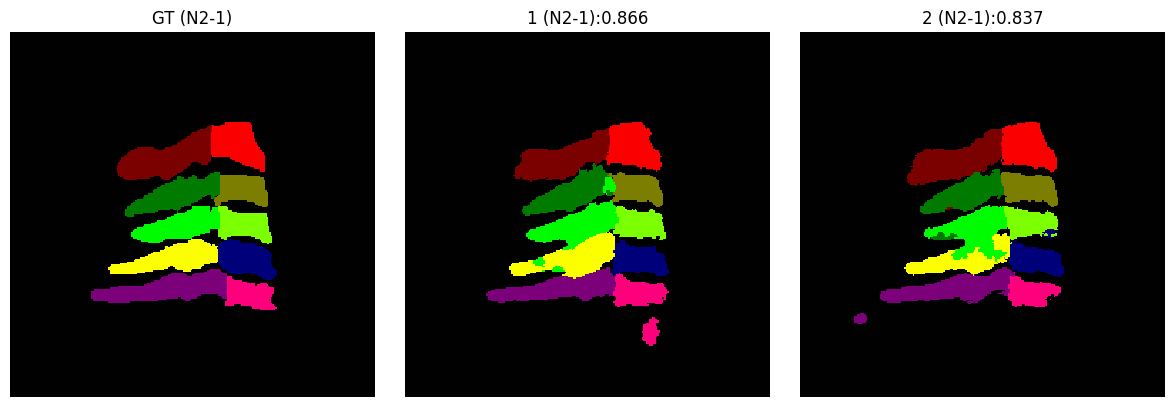

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
Count1 =  [57681, 1394, 837, 880, 563, 717, 440, 680, 506, 1173, 665]
Count2 =  [57404, 1611, 856, 890, 527, 820, 538, 748, 500, 1110, 532]
Count3 =  [56792, 1387, 809, 808, 498, 657, 416, 467, 359, 742, 496]
Dice =  [0.9869574662206195, 0.9231281198003328, 0.9556999409332546, 0.9129943502824859, 0.9137614678899083, 0.8549121665582303, 0.8507157464212679, 0.65406162464986, 0.7137176938369781, 0.6500219010074464, 0.8287385129490392, 0.8257751524328804]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
Count1 =  [58104, 1423, 860, 872, 564, 491, 271, 914, 536, 918, 583]
Count2 =  [57404, 1611, 856, 890, 527, 820, 538, 748, 500, 1110, 532]
Count3 =  [56991, 1399, 815, 816, 504, 475, 246, 531, 226, 725, 311]
Dice =  [0.9867887938497767, 0.9222148

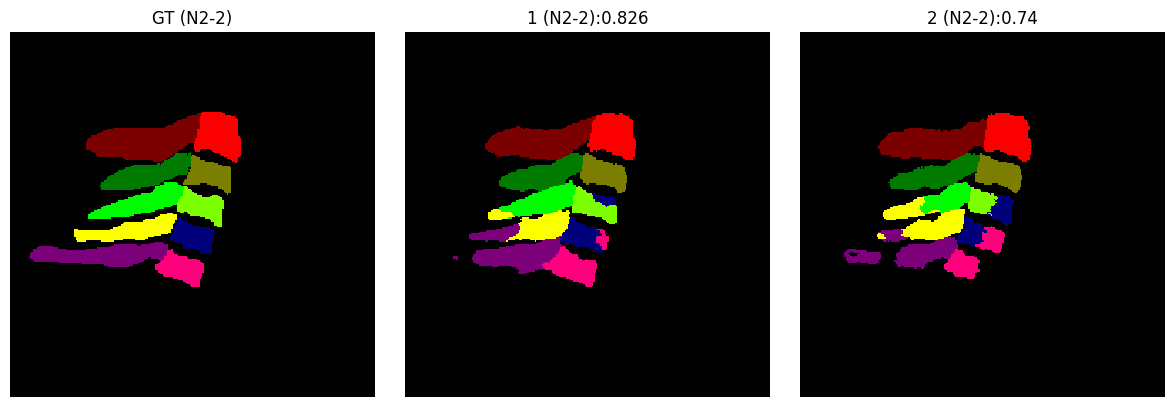

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-3.png
image: N2-3 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-4.png
image: N2-4 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-5.png
image: N2-5 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-6.png
image: N2-6 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png
image: N2-7 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
im

[ WARN:0@2041.399] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.399] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N2-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.399] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.401] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.401] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N2-4.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.401] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N2-4.png'): can't open/read file: ch

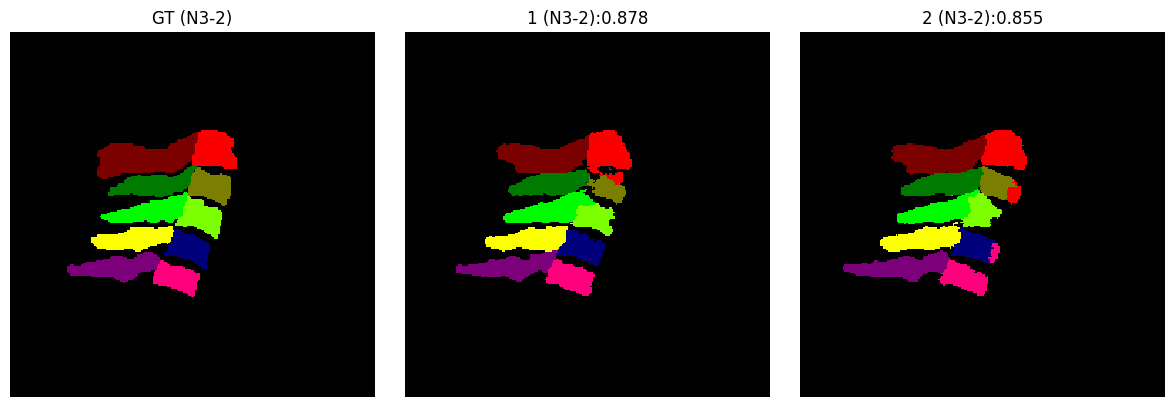

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
Count1 =  [59556, 952, 497, 783, 430, 583, 451, 673, 461, 704, 446]
Count2 =  [59591, 1014, 536, 714, 415, 581, 462, 575, 442, 807, 399]
Count3 =  [59014, 897, 421, 677, 381, 511, 428, 543, 422, 634, 383]
Dice =  [0.9906082402410468, 0.9125127161749745, 0.8151016456921588, 0.9044756179024717, 0.901775147928994, 0.8780068728522337, 0.9375684556407448, 0.8701923076923077, 0.9346622369878184, 0.8391793514228988, 0.906508875739645, 0.8899983228034247]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
Count1 =  [59671, 975, 540, 766, 724, 621, 139, 543, 402, 688, 467]
Count2 =  [59591, 1014, 536, 714, 415, 581, 462, 575, 442, 807, 399]
Count3 =  [59073, 832, 483, 689, 396, 554, 132, 518, 396, 646, 382]
Dice =  [0.9906424510741058, 0.83660130718954

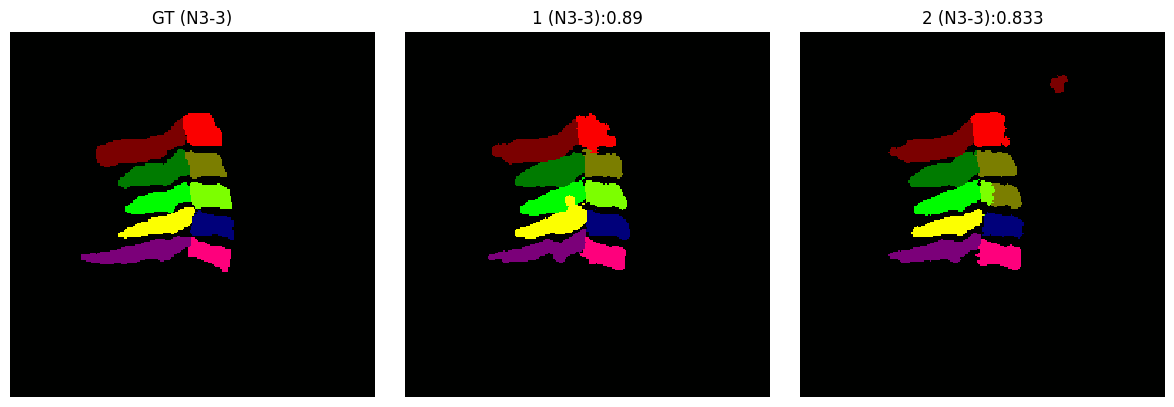

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-4.png
image: N3-4 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-5.png
image: N3-5 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-6.png
image: N3-6 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
image: N3-7 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-8.png
image: N3-8 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-9.png
Co

[ WARN:0@2041.773] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-4.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.773] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N3-4.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.773] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-4.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.775] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.775] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@2041.775] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-5.png'): can't open/read file: ch

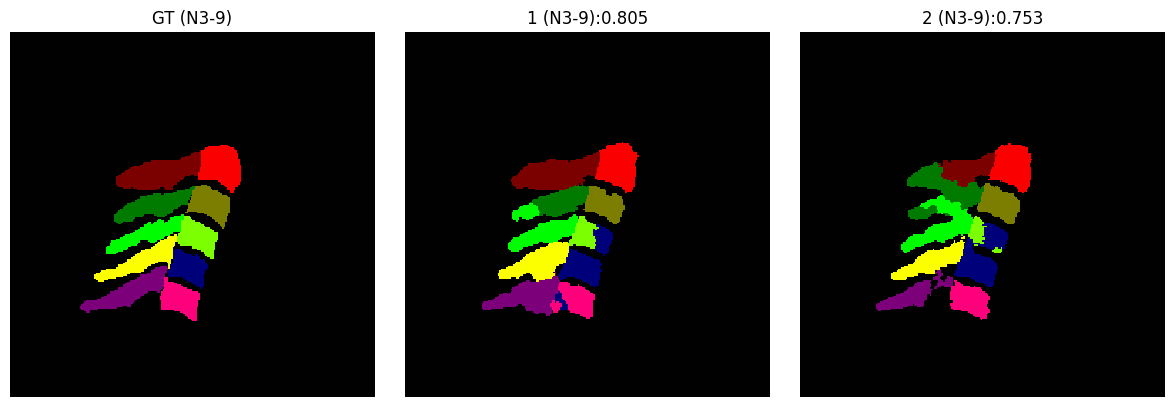

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-10.png
image: N3-10 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-1.png
Count1 =  [57665, 1167, 678, 1103, 566, 846, 394, 614, 426, 1440, 637]
Count2 =  [57350, 1250, 723, 987, 609, 944, 596, 855, 497, 1212, 513]
Count3 =  [56938, 1070, 644, 966, 523, 805, 390, 561, 341, 1113, 472]
Dice =  [0.9900969438768856, 0.8853951179147703, 0.9193433261955746, 0.9244019138755981, 0.8902127659574468, 0.8994413407821229, 0.7878787878787878, 0.763784887678693, 0.7388949079089924, 0.8393665158371041, 0.8208695652173913, 0.8469589129246481]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N4-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-1.png
Count1 =  [57931, 1153, 580, 968, 596, 837, 312, 844, 636, 1177, 502]


[ WARN:0@2042.024] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-10.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.024] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N3-10.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.024] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N3-10.png'): can't open/read file: check file path/integrity


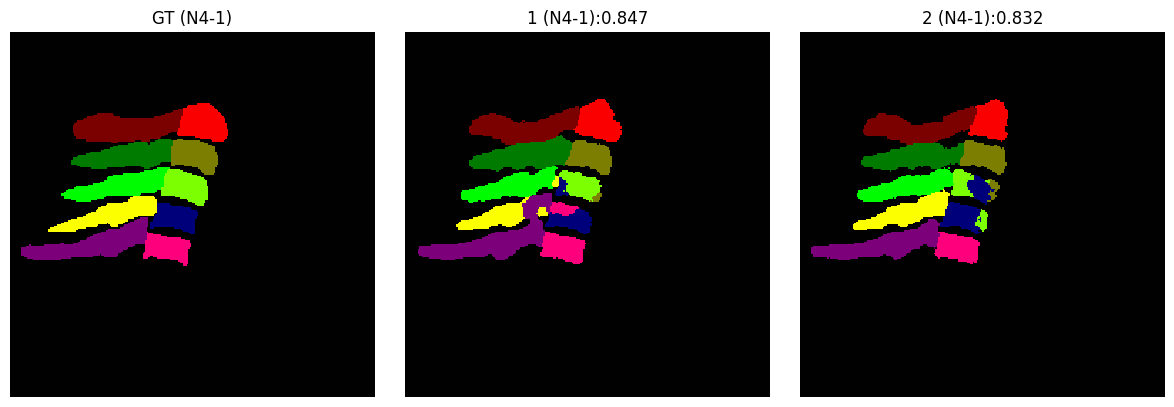

[ WARN:0@2042.198] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-2.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.198] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N4-2.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.198] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-2.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.199] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.199] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N4-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.199] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-3.png'): can't open/read file: ch

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-2.png
image: N4-2 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-3.png
image: N4-3 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-4.png
image: N4-4 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-5.png
image: N4-5 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-6.png
Count1 =  [59687, 865, 551, 636, 372, 481, 351, 832, 764, 586, 411]
Count2 =  [60245, 858, 608, 584, 389, 412, 389, 542, 481, 618, 410]
Count3 =  [59241, 821, 541, 562, 356

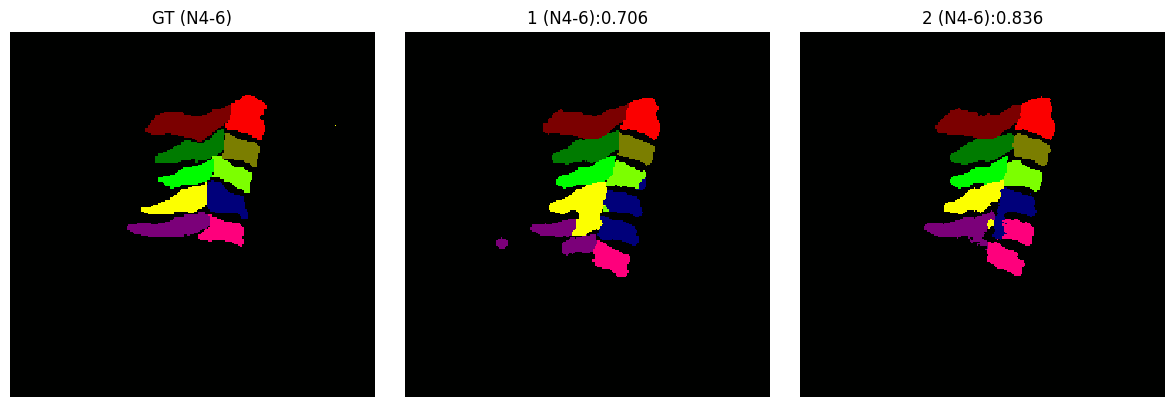

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-7.png
image: N4-7 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-8.png
image: N4-8 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
image: N4-9 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png
image: N4-10 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-1.png


[ WARN:0@2042.389] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.389] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N4-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.389] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.390] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.390] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N4-8.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.390] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N4-8.png'): can't open/read file: ch

Count1 =  [60621, 693, 621, 628, 403, 351, 397, 427, 342, 720, 333]
Count2 =  [60323, 681, 734, 432, 456, 413, 382, 476, 371, 854, 414]
Count3 =  [59904, 620, 615, 361, 373, 207, 331, 388, 327, 671, 328]
Dice =  [0.990607223177669, 0.9024745269286754, 0.9077490774907749, 0.6811320754716981, 0.8684516880093132, 0.5418848167539267, 0.8498074454428755, 0.8593576965669989, 0.9172510518934082, 0.8526048284625158, 0.8781793842034806, 0.8258892591223668]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N5-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-1.png
Count1 =  [60351, 663, 667, 607, 411, 576, 294, 345, 425, 789, 408]
Count2 =  [60323, 681, 734, 432, 456, 413, 382, 476, 371, 854, 414]
Count3 =  [59810, 633, 660, 356, 383, 260, 254, 218, 323, 719, 379]
Dice =  [0.9912657241825082, 0.9419642857142857, 0.9421841541755889, 0.685274302213667, 0.8835063437139562, 0.5257836198179979, 0.7514792899408284, 0.5310596833130329, 0.8115577889447236, 0.8752

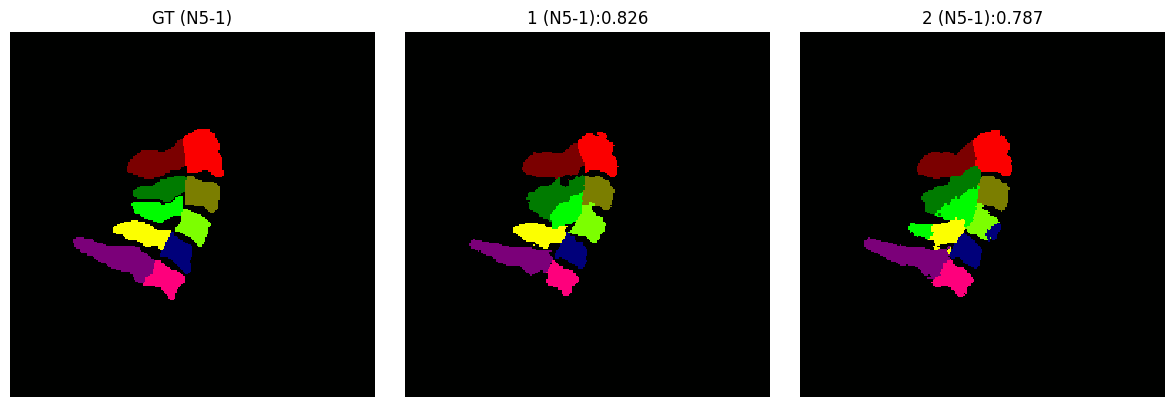

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-2.png
image: N5-2 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-3.png
image: N5-3 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-4.png
image: N5-4 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-5.png
image: N5-5 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png


[ WARN:0@2042.578] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-2.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.578] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N5-2.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.578] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-2.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.579] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.579] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N5-3.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.579] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-3.png'): can't open/read file: ch

Count1 =  [64098, 338, 149, 0, 226, 249, 0, 289, 83, 0, 104]
Count2 =  [61373, 426, 327, 368, 347, 302, 320, 451, 309, 922, 391]
Count3 =  [61182, 308, 145, 0, 213, 0, 0, 0, 0, 0, 0]
Dice =  [0.9752373058316264, 0.806282722513089, 0.6092436974789915, 0.0, 0.743455497382199, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21589819173742794]
index =  0
予測画像: /home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png
Count1 =  [63979, 542, 0, 294, 233, 0, 0, 71, 30, 318, 69]
Count2 =  [61373, 426, 327, 368, 347, 302, 320, 451, 309, 922, 391]
Count3 =  [60617, 11, 0, 250, 122, 0, 0, 0, 0, 0, 0]
Dice =  [0.9671485097964133, 0.022727272727272728, 0.0, 0.7552870090634441, 0.4206896551724138, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11987039369631307]


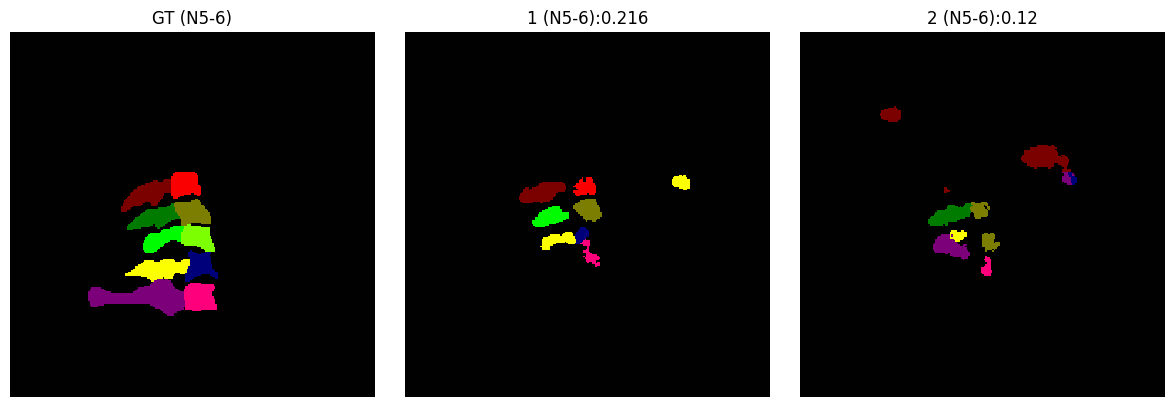

index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png
image: N5-7 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-8.png
image: N5-8 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-9.png
image: N5-9 not found
index =  0
予測画像: /home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-10.png
image: N5-10 not found


[ WARN:0@2042.767] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.768] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.768] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/MCU-Net/fold1/crf/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.768] global loadsave.cpp:248 findDecoder imread_('/home/eric/Desktop/icisip2025/U-Net/fold1/crf/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.768] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@2042.768] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled

In [20]:

fold = "fold1"
imgs_name = []
for i in range(5):
    for j in range (10):
        imgs_name.append(f"N{i+1}-{j+1}")

searchdir =  searchdir + "/" + fold + "/crf"
searchdir2 = searchdir2 + "/"  + fold + "/crf"
    

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for img_name in imgs_name:
    try:
        img_label = cv2.imread(labeled_dir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(searchdir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(searchdir2 + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        
        
        Dice1 = cal_DiceMulitple(searchdir, [img_name])
        df = pd.DataFrame(Dice1)
        df = df.T

        Dice2 = cal_DiceMulitple(searchdir2, [img_name])
        df = pd.DataFrame(Dice2)
        df = df.T
        
        
        

        fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches
        colors = ['#000100', '#7B0000', '#FB0000', '#007B00', '#7B7E00', '#00FC00', '#7CFF00', '#FCFF00', '#00007A', '#7B0079', '#FE007C']
        cmap = ListedColormap(colors[:11])
        
        # 1. Plot the first image
        axes[0].imshow(img_label, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[0].set_title(f'GT ({img_name})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 2. Plot the first image
        axes[1].imshow(img, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[1].set_title(f'1 ({img_name}):{np.round(Dice1[-1], 3)}') # Caption for the first plot
        axes[1].axis('off') # Hide axis

        # 3. Plot the second image
        axes[2].imshow(img2, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[2].set_title(f'2 ({img_name}):{np.round(Dice2[-1], 3)}') # Caption for the second plot
        axes[2].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
    except:
        print(f"image: {img_name} not found")